## installing the tools + adding the data

In [2]:
pip install numpy
pip install nltk
pip install gensim
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [177]:
import nltk
import re
import os

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# to turn each word into an item
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer

# to tag each word as a part of speech
from nltk.tag import pos_tag

# NLTK's list of stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/susanedang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/susanedang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/susanedang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [153]:
# importing the data and combining the CSVs

import pandas as pd
yt_info = pd.read_csv('combined_apr18_2251.csv')

In [154]:
# making a dataframe that excludes certain columns
# use 'ID' column as index
pd.read_csv('combined_apr18_2251.csv',index_col='ID') 

# read specific columns
yt_info_prune = pd.read_csv('combined_apr18_2251.csv',usecols=['ID','Title','Date Posted','Video likes percentage','Status','Main channel','Genre','Gender','Race','Reason','Transcript'])

# make dataframe from CSV
df_yt_info_prune = pd.DataFrame(yt_info_prune)

## creating the corpora

In [157]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## all transcripts

In [161]:
# all transcripts
# ---------------------------
# making dataframe
df_transcript_all = df_yt_info_prune.filter(['Transcript'], axis=1)
df_transcript_all.to_string(r'/Users/susanedang/Python/apology/df_transcript_all.txt', index=False)

# making a corpus
all_apos = open('df_transcript_all.txt', encoding="utf-8").read()
all_apos = all_apologies.lower() # lowercase 
all_apos = re.sub('\W+',' ', all_apologies) # non-alphanumeric characters
all_apos = re.sub(r"[^a-zA-Z0-9]+", ' ', all_apologies) # non-alphanumeric characters

# tokenize
all_apos_token = word_tokenize(all_apos)

# making lemmatized list
lemma = WordNetLemmatizer()
all_apos_lemma = []
all_apos_filter = []

from nltk.corpus import stopwords
stopwords = stopwords.words('english')

for word in all_apos:
    all_apos_lemma.append(lemma.lemmatize(word))
    
for word in all_apos_token:
    if word not in stopwords:
        all_apos_filter.append(word)
    
# lemmatized version of tags
all_apos_text = nltk.Text(all_apos_token)

# tag every word
all_apos = nltk.pos_tag(all_apos_text)

### topic modeling

In [117]:
import gensim

In [118]:
from gensim import corpora
from gensim.utils import simple_preprocess

In [129]:
all_apos_token = [simple_preprocess(all_apos) for all_apos in all_apos_filter]
all_apos_dict = corpora.Dictionary(all_apos_token)
all_apos_corp = [all_apos_dict.doc2bow(text) for text in all_apos_token]

In [132]:
# 10 passes, 20 topics

NUM_TOPICS = 20

ldamodel = gensim.models.ldamodel.LdaModel(corpus=all_apos_corp, num_topics = NUM_TOPICS, id2word=all_apos_dict, passes= 10)
ldamodel.save('model5.gensim')

# store topics
topics = ldamodel.print_topics(num_words=30)
counter = 0

# print the topics
for topic in topics:
    counter = counter + 1
    print("Topic #", counter)
    print("--------------------------")
    print(topic)
    print("")

Topic # 1
--------------------------
(0, '0.475*"like" + 0.131*"video" + 0.111*"think" + 0.062*"got" + 0.051*"still" + 0.017*"different" + 0.015*"might" + 0.013*"couple" + 0.011*"month" + 0.011*"straight" + 0.005*"sitting" + 0.005*"partner" + 0.000*"cringy" + 0.000*"egotistical" + 0.000*"assassin" + 0.000*"billion" + 0.000*"humble" + 0.000*"dumbass" + 0.000*"culturally" + 0.000*"browsing" + 0.000*"approve" + 0.000*"indian" + 0.000*"heaviest" + 0.000*"teenagers" + 0.000*"characters" + 0.000*"latina" + 0.000*"stereotypes" + 0.000*"bickering" + 0.000*"highly" + 0.000*"clouds"')

Topic # 2
--------------------------
(1, '0.118*"long" + 0.094*"stupid" + 0.085*"tell" + 0.064*"may" + 0.063*"word" + 0.062*"social" + 0.036*"meant" + 0.033*"comment" + 0.021*"exact" + 0.018*"impact" + 0.016*"ashamed" + 0.011*"creating" + 0.010*"worth" + 0.009*"channels" + 0.009*"passionate" + 0.009*"solution" + 0.004*"complex" + 0.003*"emotionally" + 0.001*"occasions" + 0.000*"alive" + 0.000*"chest" + 0.000*"char

In [133]:
# 20 passes, 20 topics

NUM_TOPICS = 20

ldamodel = gensim.models.ldamodel.LdaModel(corpus=all_apos_corp, num_topics = NUM_TOPICS, id2word=all_apos_dict, passes= 20)
ldamodel.save('model5.gensim')

# store topics
topics = ldamodel.print_topics(num_words=30)
counter = 0

# print the topics
for topic in topics:
    counter = counter + 1
    print("Topic #", counter)
    print("--------------------------")
    print(topic)
    print("")

Topic # 1
--------------------------
(0, '0.627*"like" + 0.044*"long" + 0.038*"thank" + 0.029*"took" + 0.023*"job" + 0.019*"left" + 0.017*"asking" + 0.013*"meant" + 0.012*"fix" + 0.011*"happens" + 0.009*"experience" + 0.009*"home" + 0.009*"email" + 0.006*"stand" + 0.005*"excuses" + 0.004*"short" + 0.002*"possibly" + 0.002*"absolute" + 0.001*"pride" + 0.000*"handle" + 0.000*"stereotypes" + 0.000*"sheltered" + 0.000*"aspect" + 0.000*"racism" + 0.000*"todrick" + 0.000*"doxing" + 0.000*"teenagers" + 0.000*"latina" + 0.000*"culturally" + 0.000*"grabbed"')

Topic # 2
--------------------------
(1, '0.263*"really" + 0.107*"saying" + 0.102*"feel" + 0.079*"still" + 0.056*"last" + 0.038*"felt" + 0.034*"past" + 0.030*"public" + 0.024*"care" + 0.022*"cut" + 0.021*"believe" + 0.020*"ask" + 0.017*"drama" + 0.013*"ways" + 0.012*"exactly" + 0.010*"truth" + 0.006*"therapy" + 0.001*"silly" + 0.000*"browsing" + 0.000*"heaviest" + 0.000*"teenagers" + 0.000*"characters" + 0.000*"latina" + 0.000*"stereotype

In [134]:
# 20 passes, 10 topics

NUM_TOPICS = 10

ldamodel = gensim.models.ldamodel.LdaModel(corpus=all_apos_corp, num_topics = NUM_TOPICS, id2word=all_apos_dict, passes= 20)
ldamodel.save('model5.gensim')

# store topics
topics = ldamodel.print_topics(num_words=30)
counter = 0

# print the topics
for topic in topics:
    counter = counter + 1
    print("Topic #", counter)
    print("--------------------------")
    print(topic)
    print("")

Topic # 1
--------------------------
(0, '0.094*"guys" + 0.090*"one" + 0.057*"sorry" + 0.053*"saying" + 0.053*"made" + 0.035*"done" + 0.035*"first" + 0.031*"friends" + 0.029*"play" + 0.029*"creators" + 0.027*"understand" + 0.025*"talking" + 0.022*"two" + 0.019*"felt" + 0.019*"hate" + 0.018*"tell" + 0.015*"help" + 0.013*"ago" + 0.012*"lied" + 0.011*"either" + 0.011*"remember" + 0.011*"known" + 0.010*"watch" + 0.010*"team" + 0.009*"face" + 0.008*"meant" + 0.007*"week" + 0.007*"jesus" + 0.007*"sometimes" + 0.006*"young"')

Topic # 2
--------------------------
(1, '0.112*"things" + 0.101*"lot" + 0.051*"stuff" + 0.043*"okay" + 0.040*"yeah" + 0.035*"today" + 0.030*"work" + 0.030*"long" + 0.029*"maybe" + 0.024*"come" + 0.024*"full" + 0.020*"took" + 0.020*"true" + 0.019*"best" + 0.019*"around" + 0.018*"conversation" + 0.016*"another" + 0.016*"hurt" + 0.014*"please" + 0.014*"use" + 0.014*"left" + 0.013*"man" + 0.010*"open" + 0.009*"realized" + 0.008*"house" + 0.008*"continue" + 0.006*"losing" +

In [135]:
# 50 passes, 10 topics

NUM_TOPICS = 10

ldamodel = gensim.models.ldamodel.LdaModel(corpus=all_apos_corp, num_topics = NUM_TOPICS, id2word=all_apos_dict, passes= 50)
ldamodel.save('model5.gensim')

# store topics
topics = ldamodel.print_topics(num_words=30)
counter = 0

# print the topics
for topic in topics:
    counter = counter + 1
    print("Topic #", counter)
    print("--------------------------")
    print(topic)
    print("")

Topic # 1
--------------------------
(0, '0.102*"even" + 0.070*"sorry" + 0.062*"saying" + 0.057*"got" + 0.048*"life" + 0.042*"first" + 0.042*"done" + 0.023*"told" + 0.023*"reason" + 0.022*"channel" + 0.022*"tell" + 0.021*"big" + 0.021*"took" + 0.018*"family" + 0.018*"youtube" + 0.017*"single" + 0.017*"different" + 0.014*"find" + 0.014*"lied" + 0.014*"fans" + 0.013*"keep" + 0.013*"watch" + 0.012*"read" + 0.011*"attention" + 0.010*"fucked" + 0.009*"phone" + 0.008*"wish" + 0.007*"brought" + 0.007*"career" + 0.007*"regret"')

Topic # 2
--------------------------
(1, '0.263*"like" + 0.167*"know" + 0.065*"things" + 0.037*"also" + 0.032*"actually" + 0.027*"still" + 0.022*"part" + 0.022*"happened" + 0.022*"years" + 0.021*"anything" + 0.019*"today" + 0.018*"play" + 0.018*"long" + 0.016*"world" + 0.015*"come" + 0.013*"saw" + 0.009*"may" + 0.009*"internet" + 0.009*"working" + 0.008*"found" + 0.008*"change" + 0.008*"left" + 0.007*"cut" + 0.006*"since" + 0.006*"post" + 0.006*"responsibility" + 0.00

## scams only

In [148]:
df_scam = df_yt_info_prune[df_yt_info_prune["Reason"] == 'scamming']

In [164]:
df_transcript_scam = df_scam.filter(['Transcript'], axis=1)
df_transcript_scam.to_string(r'/Users/susanedang/Python/apology/df_transcript_scam.txt', index=False)

# making a corpus
scam = open('df_transcript_scam.txt', encoding="utf-8").read()
scam = all_apologies.lower() # lowercase 
scam = re.sub('\W+',' ', all_apologies) # non-alphanumeric characters
scam  = re.sub(r"[^a-zA-Z0-9]+", ' ', all_apologies) # non-alphanumeric characters

# tokenize
scam_token = word_tokenize(scam)

# making lemmatized list
lemma = WordNetLemmatizer()
scam_lemma = []
scam_filter = []

from nltk.corpus import stopwords
stopwords = stopwords.words('english')

for word in scam:
    scam_lemma.append(lemma.lemmatize(word))
    
for word in scam_token:
    if word not in stopwords:
        scam_filter.append(word)
    
# lemmatized version of tags
scam_text = nltk.Text(all_apos_token)

# tag every word
all_scam = nltk.pos_tag(all_apos_text)

### topic modeling (scam)

In [165]:
import gensim

In [166]:
from gensim import corpora
from gensim.utils import simple_preprocess

In [231]:
scam_token = [simple_preprocess(scam) for scam in scam_filter]
scam_dict = corpora.Dictionary(scam_token)
scam_corp = [scam_dict.doc2bow(text) for text in scam_token]

In [171]:
# 10 passes, 10 topics

NUM_TOPICS = 10

ldamodel = gensim.models.ldamodel.LdaModel(corpus=scam_corp, num_topics = NUM_TOPICS, id2word=scam_dict, passes= 10)
ldamodel.save('model5.gensim')

# store topics
topics = ldamodel.print_topics(num_words=30)
counter = 0

# print the topics
for topic in topics:
    counter = counter + 1
    print("Topic #", counter)
    print("--------------------------")
    print(topic)
    print("")

Topic # 1
--------------------------
(0, '0.089*"guys" + 0.080*"lot" + 0.079*"think" + 0.057*"something" + 0.042*"take" + 0.037*"mean" + 0.032*"first" + 0.030*"part" + 0.028*"creators" + 0.027*"years" + 0.025*"probably" + 0.024*"work" + 0.021*"real" + 0.018*"reason" + 0.017*"look" + 0.015*"best" + 0.014*"seen" + 0.014*"relationship" + 0.014*"though" + 0.013*"bit" + 0.011*"please" + 0.011*"run" + 0.010*"days" + 0.010*"three" + 0.010*"whatever" + 0.009*"couple" + 0.009*"words" + 0.008*"entire" + 0.007*"forgive" + 0.007*"far"')

Topic # 2
--------------------------
(1, '0.209*"know" + 0.084*"things" + 0.069*"get" + 0.060*"kind" + 0.040*"game" + 0.039*"go" + 0.038*"person" + 0.033*"fucking" + 0.027*"call" + 0.026*"many" + 0.023*"came" + 0.016*"show" + 0.015*"watching" + 0.015*"apologize" + 0.012*"everybody" + 0.012*"social" + 0.011*"able" + 0.010*"lie" + 0.008*"fans" + 0.008*"online" + 0.007*"using" + 0.007*"age" + 0.006*"live" + 0.006*"stream" + 0.006*"positive" + 0.006*"huge" + 0.006*"in

In [172]:
# 50 passes, 10 topics

NUM_TOPICS = 10

ldamodel = gensim.models.ldamodel.LdaModel(corpus=scam_corp, num_topics = NUM_TOPICS, id2word=scam_dict, passes= 50)
ldamodel.save('model5.gensim')

# store topics
topics = ldamodel.print_topics(num_words=30)
counter = 0

# print the topics
for topic in topics:
    counter = counter + 1
    print("Topic #", counter)
    print("--------------------------")
    print(topic)
    print("")

Topic # 1
--------------------------
(0, '0.064*"made" + 0.056*"got" + 0.052*"could" + 0.046*"trying" + 0.046*"mean" + 0.046*"much" + 0.044*"fucking" + 0.041*"yeah" + 0.039*"someone" + 0.033*"making" + 0.033*"today" + 0.030*"getting" + 0.023*"give" + 0.022*"hate" + 0.017*"youtube" + 0.016*"anybody" + 0.014*"job" + 0.014*"whatever" + 0.013*"run" + 0.013*"days" + 0.012*"known" + 0.012*"feeling" + 0.011*"face" + 0.011*"since" + 0.010*"fucked" + 0.010*"month" + 0.009*"problem" + 0.009*"meant" + 0.009*"huge" + 0.008*"positive"')

Topic # 2
--------------------------
(1, '0.074*"said" + 0.073*"thing" + 0.065*"way" + 0.058*"sorry" + 0.052*"feel" + 0.036*"every" + 0.032*"part" + 0.032*"happened" + 0.032*"years" + 0.031*"anything" + 0.026*"always" + 0.019*"stupid" + 0.018*"tell" + 0.018*"already" + 0.018*"show" + 0.017*"god" + 0.015*"conversation" + 0.015*"end" + 0.014*"social" + 0.014*"looking" + 0.013*"may" + 0.013*"internet" + 0.012*"change" + 0.011*"keep" + 0.010*"fault" + 0.010*"team" + 0.

In [232]:
# 10 passes, 10 topics

NUM_TOPICS = 10

ldamodel = gensim.models.ldamodel.LdaModel(corpus=scam_corp, num_topics = NUM_TOPICS, id2word=scam_dict, passes= 50)
ldamodel.save('model5.gensim')

# store topics
topics = ldamodel.print_topics(num_words=10)
counter = 0

# print the topics
for topic in topics:
    counter = counter + 1
    print("Topic #", counter)
    print("--------------------------")
    print(topic)
    print("")

Topic # 1
--------------------------
(0, '0.090*"thing" + 0.057*"take" + 0.041*"someone" + 0.039*"years" + 0.031*"creators" + 0.030*"else" + 0.029*"world" + 0.029*"shit" + 0.029*"two" + 0.025*"hope"')

Topic # 2
--------------------------
(1, '0.059*"also" + 0.057*"saying" + 0.053*"got" + 0.052*"go" + 0.043*"videos" + 0.041*"fucking" + 0.039*"first" + 0.037*"many" + 0.036*"part" + 0.027*"point"')

Topic # 3
--------------------------
(2, '0.204*"know" + 0.081*"say" + 0.062*"said" + 0.033*"mean" + 0.033*"much" + 0.032*"ever" + 0.031*"okay" + 0.029*"yeah" + 0.028*"love" + 0.027*"happened"')

Topic # 4
--------------------------
(3, '0.083*"get" + 0.075*"never" + 0.055*"feel" + 0.053*"back" + 0.047*"person" + 0.036*"good" + 0.033*"friends" + 0.030*"last" + 0.029*"wanted" + 0.028*"play"')

Topic # 5
--------------------------
(4, '0.254*"people" + 0.064*"see" + 0.044*"every" + 0.037*"us" + 0.034*"twitter" + 0.031*"came" + 0.024*"saw" + 0.021*"around" + 0.020*"best" + 0.020*"watching"')

To

In [228]:
pip install pickle-mixin

  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5990 sha256=6a7262fb0a008b107634d12298e4227dc041e42eb0eec70c75469f088adedd44
  Stored in directory: /Users/susanedang/Library/Caches/pip/wheels/d0/9c/0d/8709be17c02b72bf04ea60d8ec64fc46a1554c0fb81e048dd6
Successfully built pickle-mixin
Note: you may need to restart the kernel to use updated packages.


In [229]:
pip install pyldavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 225.9 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 189.2 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 238.6 kB/s eta 0:00:00m eta 0:00:010:00:02
Note: you may need to restart the kernel to use updated packages.


In [227]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(ldamodel, corpus, dictionary)
LDAvis_prepared

ModuleNotFoundError: No module named 'pyLDAvis'

## sentiment analysis

In [191]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [192]:
# df_scam

,ID,Title,Date Posted,Video likes percentage,Status,Main channel,Genre,Gender,Race,Reason,Transcript
3,004_Fine,Update.,1/31/2016,14.86%,deleted,True,commentary,m m,white,scamming,"Hey everybody, this video is us wanting to ex..."
7,008_Tmar,I'm Sorry,7/6/2016,36.42%,deleted,True,gaming,m,white,scamming,"Cooper, I have no idea how I'm gonna record th..."
15,016_Kenna,i'm sorry //,7/30/2017,NaN,deleted,True,beauty,w,white,scamming,My cards are all out on the table now. Will y...
18,019_Zoe,CHRISTMAS ADVERTS & HOW WE MET,11/14/2017,90.49%,original,False,lifestyle,w,white,scamming,Hello! Good morning! It is Thursday! One more ...
24,025_Tana,"Tanacon: The good, the bad, and the ugly",7/30/2018,75.98%,original,True,lifestyle,w,white,scamming,"Hi guys, it's Tanemoujo. Welcome to my channel..."
31,032_Britt,My Public Statement About The Past 24 Hours,2/6/2019,4.44%,privated,True,health,w,white,scamming,"Hey guys, I'm not really sure where to start t..."
36,037_Jaclyn,My Lipsticks,6/12/2019,47.19%,original,True,beauty,w,white,scamming,"Hey guys, welcome back to my channel. For toda..."
65,066_Kay,What Really Happened,8/13/2021,63.16%,original,True,gaming,m,white,scamming,I don't have any of those. You have a million ...
74,075_Ruxin,I Made A Huge Mistake,11/24/2022,98.36%,original,True,gaming,m,white,scamming,Today I'm making a video that no YouTuber rea...


In [198]:
# df_scam.rename(columns={'ID': 'yt_ids'})

,yt_ids,Title,Date Posted,Video likes percentage,Status,Main channel,Genre,Gender,Race,Reason,Transcript
3,004_Fine,Update.,1/31/2016,14.86%,deleted,True,commentary,m m,white,scamming,"Hey everybody, this video is us wanting to ex..."
7,008_Tmar,I'm Sorry,7/6/2016,36.42%,deleted,True,gaming,m,white,scamming,"Cooper, I have no idea how I'm gonna record th..."
15,016_Kenna,i'm sorry //,7/30/2017,NaN,deleted,True,beauty,w,white,scamming,My cards are all out on the table now. Will y...
18,019_Zoe,CHRISTMAS ADVERTS & HOW WE MET,11/14/2017,90.49%,original,False,lifestyle,w,white,scamming,Hello! Good morning! It is Thursday! One more ...
24,025_Tana,"Tanacon: The good, the bad, and the ugly",7/30/2018,75.98%,original,True,lifestyle,w,white,scamming,"Hi guys, it's Tanemoujo. Welcome to my channel..."
31,032_Britt,My Public Statement About The Past 24 Hours,2/6/2019,4.44%,privated,True,health,w,white,scamming,"Hey guys, I'm not really sure where to start t..."
36,037_Jaclyn,My Lipsticks,6/12/2019,47.19%,original,True,beauty,w,white,scamming,"Hey guys, welcome back to my channel. For toda..."
65,066_Kay,What Really Happened,8/13/2021,63.16%,original,True,gaming,m,white,scamming,I don't have any of those. You have a million ...
74,075_Ruxin,I Made A Huge Mistake,11/24/2022,98.36%,original,True,gaming,m,white,scamming,Today I'm making a video that no YouTuber rea...


In [202]:
# scam_transcripts = df_scam.loc[,'Transcript']

In [203]:
# print (scam_transcripts)

3      Hey everybody, this video is us wanting to ex...
7     Cooper, I have no idea how I'm gonna record th...
15     My cards are all out on the table now. Will y...
18    Hello! Good morning! It is Thursday! One more ...
24    Hi guys, it's Tanemoujo. Welcome to my channel...
31    Hey guys, I'm not really sure where to start t...
36    Hey guys, welcome back to my channel. For toda...
65    I don't have any of those. You have a million ...
74     Today I'm making a video that no YouTuber rea...
Name: Transcript, dtype: object


In [206]:
f = open('df_transcript_scam.txt','r')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

text_1 = f
sent_1 = sentiment.polarity_scores(f)
print("Sentiment of text 1:", sent_1)


In [209]:
from nltk.probability import FreqDist

In [226]:
fdist = FreqDist(scam_filter)
fdist.most_common(20)

[('like', 2827),
 ('know', 1572),
 ('people', 1066),
 ('want', 896),
 ('going', 751),
 ('video', 744),
 ('really', 731),
 ('one', 561),
 ('time', 531),
 ('would', 519),
 ('things', 514),
 ('get', 486),
 ('guys', 480),
 ('even', 478),
 ('make', 473),
 ('say', 466),
 ('think', 455),
 ('lot', 435),
 ('never', 412),
 ('said', 406)]

In [217]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 2.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 4.6 MB/s eta 0:00:00m eta 0:00:010:01:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [223]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 653.4 kB/s eta 0:00:000:00:01m eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


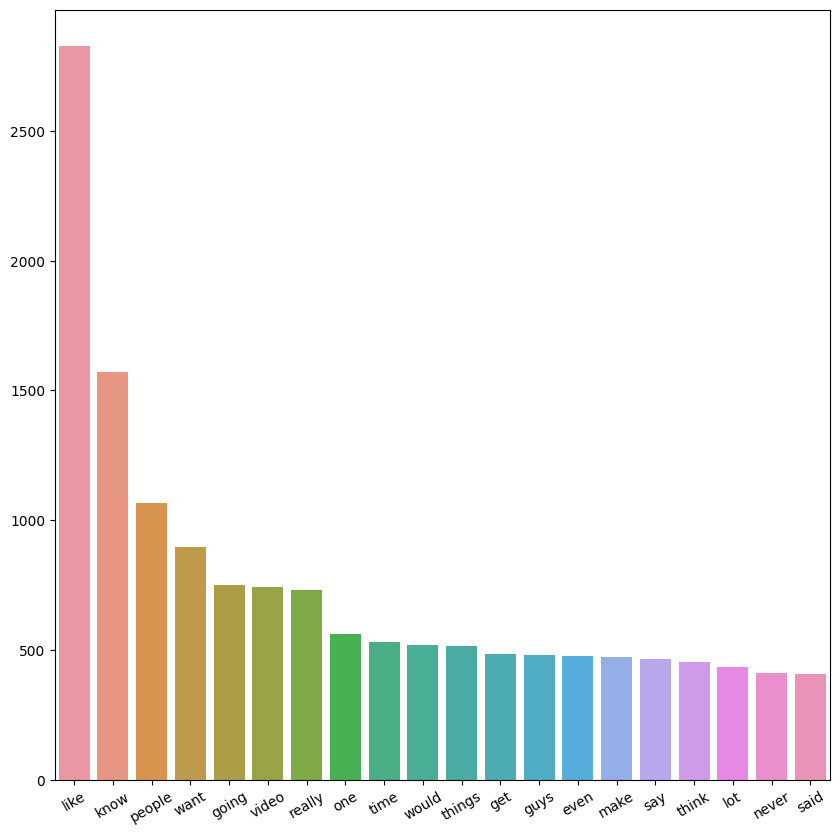

In [224]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


all_fdist = FreqDist(scam_filter).most_common(20)
all_fdist = pd.Series(dict(all_fdist))

fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);


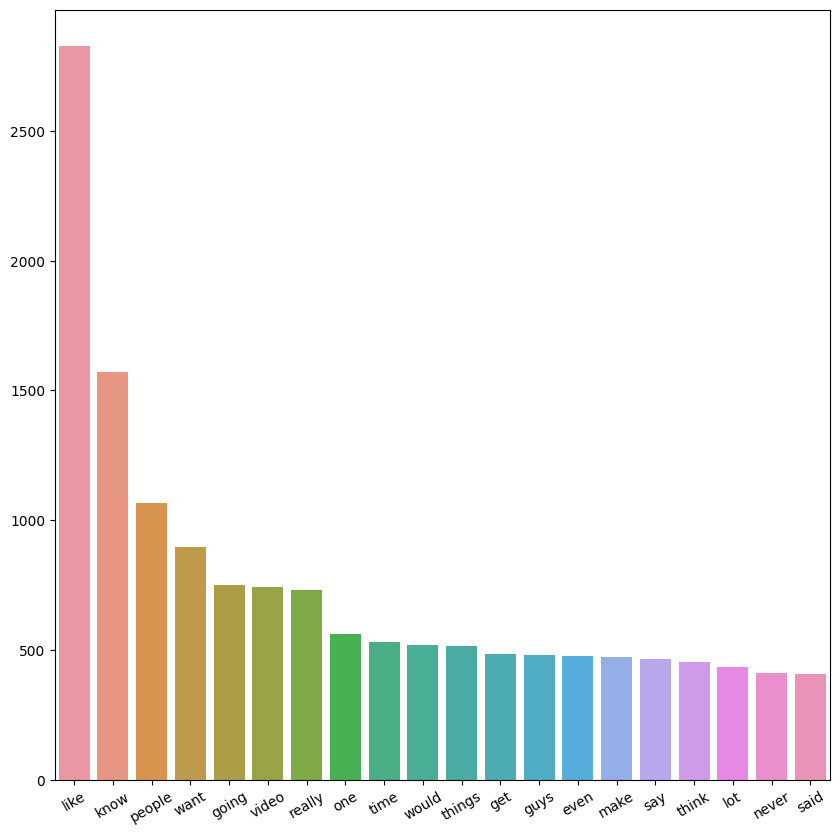

In [225]:
all_fdist = FreqDist(all_apos_filter).most_common(20)
all_fdist = pd.Series(dict(all_fdist))

fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);